In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('/kaggle/input/covid-19-location-and-affect/covid_19_clean_complete.csv')
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [4]:
data.shape

(49068, 10)

In [5]:
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [6]:
data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [7]:
data.rename(columns = {
    'Province/State' : 'state',
    'Country/Region' : 'country'}, inplace = True)

In [8]:
data.isnull().sum()

state         34404
country           0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [9]:
data[data['state'].isnull()==False]

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,0,Western Pacific
10,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0,0,Western Pacific
11,Queensland,Australia,-27.4698,153.0251,2020-01-22,0,0,0,0,Western Pacific
12,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
49052,Anguilla,United Kingdom,18.2206,-63.0686,2020-07-27,3,0,3,0,Europe
49053,British Virgin Islands,United Kingdom,18.4207,-64.6400,2020-07-27,8,1,7,0,Europe
49054,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,2020-07-27,99,2,36,61,Europe
49059,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-07-27,13,0,13,0,Europe


In [10]:
data['state'].value_counts()

state
Australian Capital Territory    188
Yunnan                          188
Mayotte                         188
Guadeloupe                      188
French Polynesia                188
                               ... 
Guizhou                         188
Guangxi                         188
Guangdong                       188
Gansu                           188
Saint Pierre and Miquelon       188
Name: count, Length: 78, dtype: int64

In [11]:
data[data['country']=='India'].count()

state           0
country       188
Lat           188
Long          188
Date          188
Confirmed     188
Deaths        188
Recovered     188
Active        188
WHO Region    188
dtype: int64

In [12]:
data[data['country']=='China'].count()

state         6204
country       6204
Lat           6204
Long          6204
Date          6204
Confirmed     6204
Deaths        6204
Recovered     6204
Active        6204
WHO Region    6204
dtype: int64

In [13]:
country_count = data.groupby('country').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'})
country_count

,Confirmed,Deaths,Recovered,Active
country,,,,
Afghanistan,1936390,49098,798240,1089052
Albania,196702,5708,118877,72117
Algeria,1179755,77972,755897,345886
Andorra,94404,5423,69074,19907
Angola,22662,1078,6573,15011
...,...,...,...,...
West Bank and Gaza,233461,1370,61124,170967
Western Sahara,901,63,648,190
Yemen,67180,17707,23779,25694


In [14]:
#Incidents on the last day
last = data[data['Date']==data['Date'].max()]
last

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [15]:
#Country wise distribution on last day
last_count = last.groupby('country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
last_count

,country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [16]:
last_count['Active'].max()

2816444

In [17]:
fig = px.choropleth (last_count,
                     locations = 'country',
                     locationmode = 'country names',
                     hover_name= 'country' ,
                     color = 'Active',
                     title = 'Last recorded Active cases in World',
                     range_color = [1,150000],
                     color_continuous_scale = 'purples')
fig.show()

In [18]:
last_count['Deaths'].max()

148011

In [19]:
fig = px.choropleth (last_count,
                     locations = 'country',
                     locationmode = 'country names',
                     hover_name= 'country' ,
                     color = 'Deaths',
                     title = 'Last recorded Death toll in World',
                     range_color = [1,150000],
                     color_continuous_scale = 'inferno_r')
fig.show()

In [20]:
data_count = data.groupby('country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
data_count['Deaths'].max()

11011411

In [21]:
fig = px.choropleth (data_count,
                     locations = 'country',
                     locationmode = 'country names',
                     hover_name= 'country' ,
                     color = 'Deaths',
                     title = 'Overall Death toll in World',
                     range_color = [1,12000000],
                     color_continuous_scale = 'inferno_r')
fig.show()

In [22]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.date

In [23]:
data['Deaths'].max()

148011

In [24]:
fig = px.choropleth (data,
                     locations = 'country',
                     locationmode = 'country names',
                     hover_name= 'country' ,
                     color = 'Deaths',
                     title = 'Day wise Death toll in World',
                     range_color = [1,150000],
                     color_continuous_scale = 'inferno_r',
                     animation_frame='Date')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [25]:
data_count['Confirmed'].max()

224345948

In [26]:
fig = px.choropleth (data_count,
                     locations = 'country',
                     locationmode = 'country names',
                     hover_name= 'country' ,
                     color = 'Confirmed',
                     title = 'Overall confirmed cases in World',
                     range_color = [1,230000000],
                     color_continuous_scale = 'orrd')
fig.show()

In [27]:
data['Confirmed'].max()

4290259

In [28]:
fig = px.choropleth (data,
                     locations = 'country',
                     locationmode = 'country names',
                     hover_name= 'country' ,
                     color = 'Confirmed',
                     title = 'Day wise confirmed cases in World',
                     range_color = [1,4500000],
                     color_continuous_scale = 'orrd',
                     animation_frame='Date')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [29]:
data_count['Recovered'].max()

56353416

In [30]:
fig = px.choropleth (data_count,
                     locations = 'country',
                     locationmode = 'country names',
                     hover_name= 'country' ,
                     color = 'Confirmed',
                     title = 'Overall recovered cases in World',
                     range_color = [1,57000000],
                     color_continuous_scale = 'greens')
fig.show()

In [31]:
#trend in confirmed cases daywise
confirmed_case = data.groupby('Date')['Confirmed'].agg('sum').reset_index()
confirmed_case

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


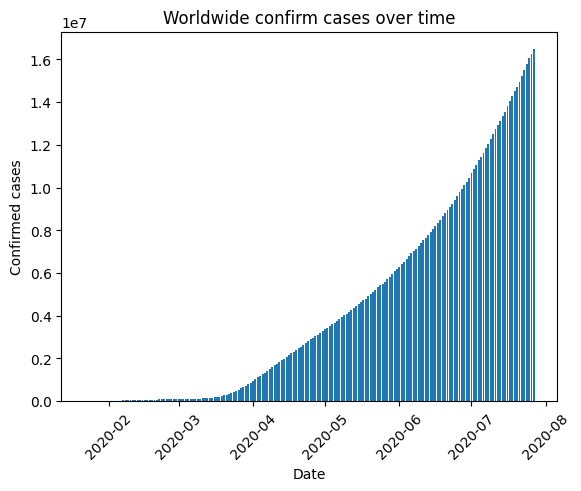

In [32]:
plt.bar(confirmed_case['Date'],confirmed_case['Confirmed'])
plt.xlabel('Date')
plt.ylabel('Confirmed cases')
plt.xticks(rotation = 45)
plt.title('Worldwide confirm cases over time')
plt.show()

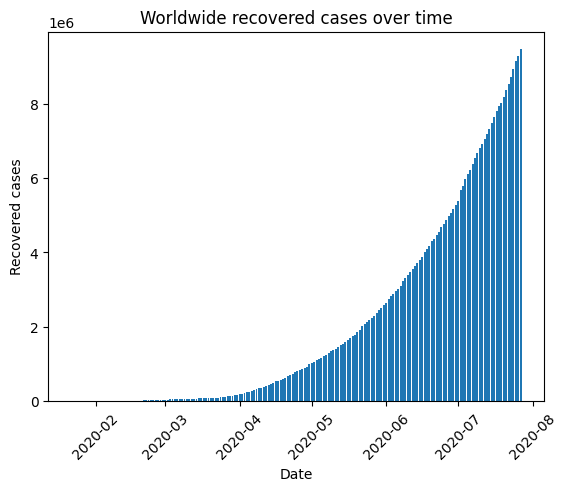

In [33]:
#trend in recovered cases daywise
recovered_case = data.groupby('Date')['Recovered'].agg('sum').reset_index()
plt.bar(recovered_case['Date'],recovered_case['Recovered'])
plt.xlabel('Date')
plt.ylabel('Recovered cases')
plt.xticks(rotation = 45)
plt.title('Worldwide recovered cases over time')
plt.show()

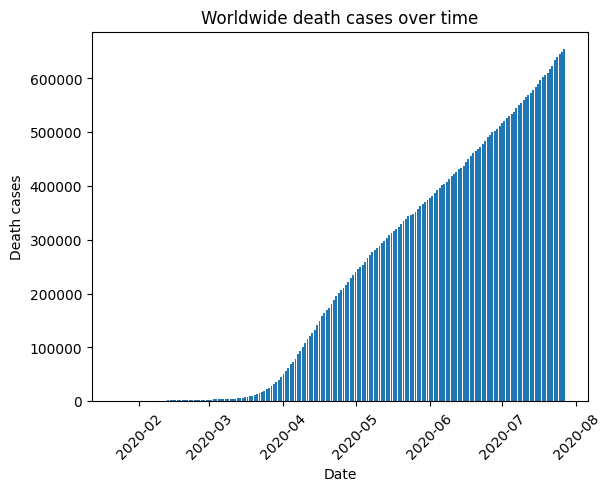

In [34]:
#trend in death cases daywise
death_case = data.groupby('Date')['Deaths'].agg('sum').reset_index()
plt.bar(death_case['Date'],death_case['Deaths'])
plt.xlabel('Date')
plt.ylabel('Death cases')
plt.xticks(rotation = 45)
plt.title('Worldwide death cases over time')
plt.show()

In [35]:
#top 20 countries with highest active cases
top_20 = last.groupby('country')['Active'].agg('sum').reset_index().sort_values(by = 'Active', ascending=False).head(20)
top_20

,country,Active
173,US,2816444
23,Brazil,508116
79,India,495499
177,United Kingdom,254427
138,Russia,201097
154,South Africa,170537
37,Colombia,117163
61,France,108928
32,Canada,107514
132,Peru,98752


[]

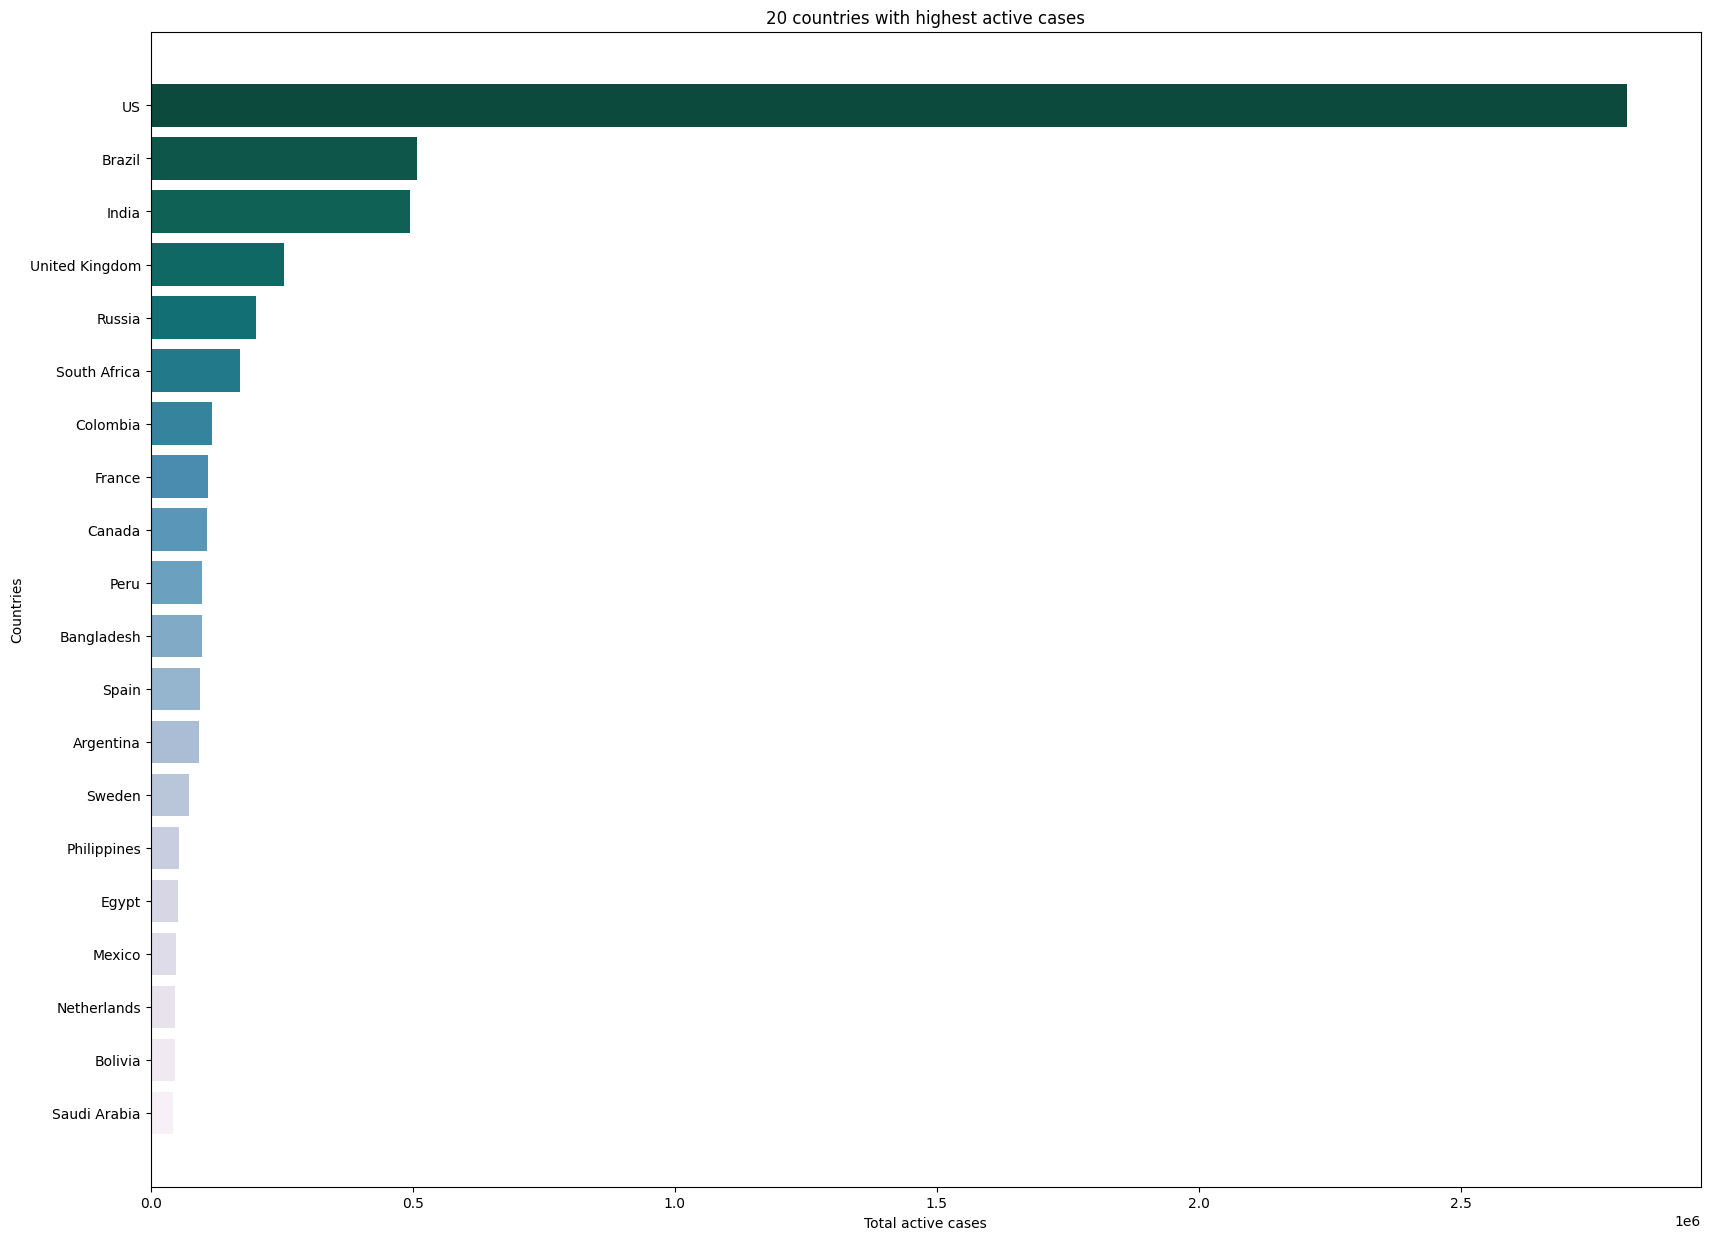

In [36]:
plt.figure(figsize=(20,15))
sns.barplot(y=top_20['country'],x=top_20['Active'], palette = 'PuBuGn_r')
plt.title('20 countries with highest active cases')
plt.ylabel('Countries')
plt.xlabel('Total active cases')
plt.plot()

In [37]:
#FBProphet (Forecast model)
!pip install prophet

In [38]:
from prophet import Prophet

In [39]:
#Date wise confirmed, recovered and death cases
confirmed = data.groupby('Date')['Confirmed'].agg('sum').reset_index()
recovered = data.groupby('Date')['Recovered'].agg('sum').reset_index()
death = data.groupby('Date')['Deaths'].agg('sum').reset_index()

In [40]:
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [41]:
recovered.head()

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [42]:
death.head()

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [43]:
#changing column names and dtype to fit the model
confirmed.columns = ['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])
recovered.columns = ['ds','y']
recovered['ds']=pd.to_datetime(recovered['ds'])
death.columns = ['ds','y']
death['ds']=pd.to_datetime(death['ds'])

In [44]:
#creating model for confirm cases
model_confirmcase = Prophet(interval_width=0.95)

In [45]:
#fitting the model for confirmed cases
model_confirmcase.fit(confirmed)

20:39:15 - cmdstanpy - INFO - Chain [1] start processing
20:39:15 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
#creating future dates for prediction of next 180 days
future = model_confirmcase.make_future_dataframe(periods=180,freq='D')
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
363,2021-01-19
364,2021-01-20
365,2021-01-21
366,2021-01-22


In [47]:
forecast_confirmcase = model_confirmcase.predict(future)
forecast_confirmcase

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.777905e+03,-1.738154e+05,1.426080e+05,-9.777905e+03,-9.777905e+03,-10998.184272,-10998.184272,-10998.184272,-10998.184272,-10998.184272,-10998.184272,0.0,0.0,0.0,-2.077609e+04
1,2020-01-23,-7.055743e+03,-1.585553e+05,1.473535e+05,-7.055743e+03,-7.055743e+03,-1105.731772,-1105.731772,-1105.731772,-1105.731772,-1105.731772,-1105.731772,0.0,0.0,0.0,-8.161475e+03
2,2020-01-24,-4.333581e+03,-1.594886e+05,1.621124e+05,-4.333581e+03,-4.333581e+03,10049.827496,10049.827496,10049.827496,10049.827496,10049.827496,10049.827496,0.0,0.0,0.0,5.716247e+03
3,2020-01-25,-1.611419e+03,-1.336355e+05,1.760108e+05,-1.611419e+03,-1.611419e+03,13740.639044,13740.639044,13740.639044,13740.639044,13740.639044,13740.639044,0.0,0.0,0.0,1.212922e+04
4,2020-01-26,1.110743e+03,-1.530924e+05,1.600369e+05,1.110743e+03,1.110743e+03,7254.883671,7254.883671,7254.883671,7254.883671,7254.883671,7254.883671,0.0,0.0,0.0,8.365627e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2021-01-19,5.204873e+07,4.017572e+07,6.164896e+07,4.016678e+07,6.169726e+07,-16795.653159,-16795.653159,-16795.653159,-16795.653159,-16795.653159,-16795.653159,0.0,0.0,0.0,5.203194e+07
364,2021-01-20,5.225279e+07,4.030122e+07,6.196249e+07,4.030061e+07,6.199357e+07,-10998.184272,-10998.184272,-10998.184272,-10998.184272,-10998.184272,-10998.184272,0.0,0.0,0.0,5.224179e+07
365,2021-01-21,5.245685e+07,4.039080e+07,6.231340e+07,4.043443e+07,6.229302e+07,-1105.731772,-1105.731772,-1105.731772,-1105.731772,-1105.731772,-1105.731772,0.0,0.0,0.0,5.245575e+07
366,2021-01-22,5.266091e+07,4.060857e+07,6.254348e+07,4.055903e+07,6.259247e+07,10049.827496,10049.827496,10049.827496,10049.827496,10049.827496,10049.827496,0.0,0.0,0.0,5.267096e+07


In [48]:
#Converting to integer type for plotting
forecast_confirmcase[['yhat','yhat_lower','yhat_upper']] = forecast_confirmcase[['yhat','yhat_lower','yhat_upper']].astype(int)
forecast_confirmcase

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.777905e+03,-173815,142608,-9.777905e+03,-9.777905e+03,-10998.184272,-10998.184272,-10998.184272,-10998.184272,-10998.184272,-10998.184272,0.0,0.0,0.0,-20776
1,2020-01-23,-7.055743e+03,-158555,147353,-7.055743e+03,-7.055743e+03,-1105.731772,-1105.731772,-1105.731772,-1105.731772,-1105.731772,-1105.731772,0.0,0.0,0.0,-8161
2,2020-01-24,-4.333581e+03,-159488,162112,-4.333581e+03,-4.333581e+03,10049.827496,10049.827496,10049.827496,10049.827496,10049.827496,10049.827496,0.0,0.0,0.0,5716
3,2020-01-25,-1.611419e+03,-133635,176010,-1.611419e+03,-1.611419e+03,13740.639044,13740.639044,13740.639044,13740.639044,13740.639044,13740.639044,0.0,0.0,0.0,12129
4,2020-01-26,1.110743e+03,-153092,160036,1.110743e+03,1.110743e+03,7254.883671,7254.883671,7254.883671,7254.883671,7254.883671,7254.883671,0.0,0.0,0.0,8365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2021-01-19,5.204873e+07,40175715,61648955,4.016678e+07,6.169726e+07,-16795.653159,-16795.653159,-16795.653159,-16795.653159,-16795.653159,-16795.653159,0.0,0.0,0.0,52031935
364,2021-01-20,5.225279e+07,40301219,61962494,4.030061e+07,6.199357e+07,-10998.184272,-10998.184272,-10998.184272,-10998.184272,-10998.184272,-10998.184272,0.0,0.0,0.0,52241792
365,2021-01-21,5.245685e+07,40390797,62313396,4.043443e+07,6.229302e+07,-1105.731772,-1105.731772,-1105.731772,-1105.731772,-1105.731772,-1105.731772,0.0,0.0,0.0,52455745
366,2021-01-22,5.266091e+07,40608573,62543482,4.055903e+07,6.259247e+07,10049.827496,10049.827496,10049.827496,10049.827496,10049.827496,10049.827496,0.0,0.0,0.0,52670960


/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



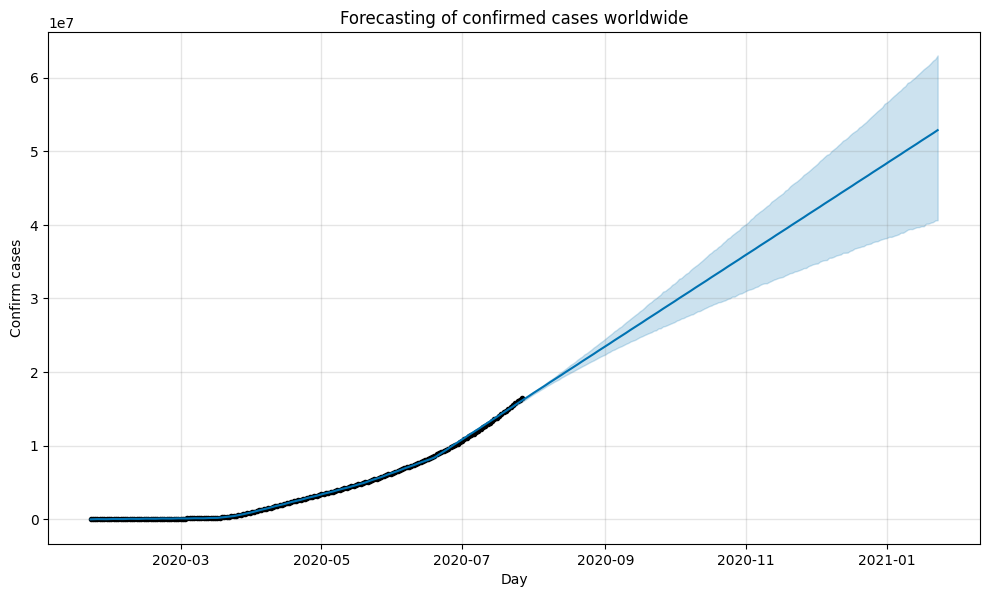

In [49]:
#ploting prediction for confirmed cases
confirm_plot = model_confirmcase.plot(forecast_confirmcase)
plt.xlabel("Day")
plt.ylabel('Confirm cases')
plt.title('Forecasting of confirmed cases worldwide')
plt.show()

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



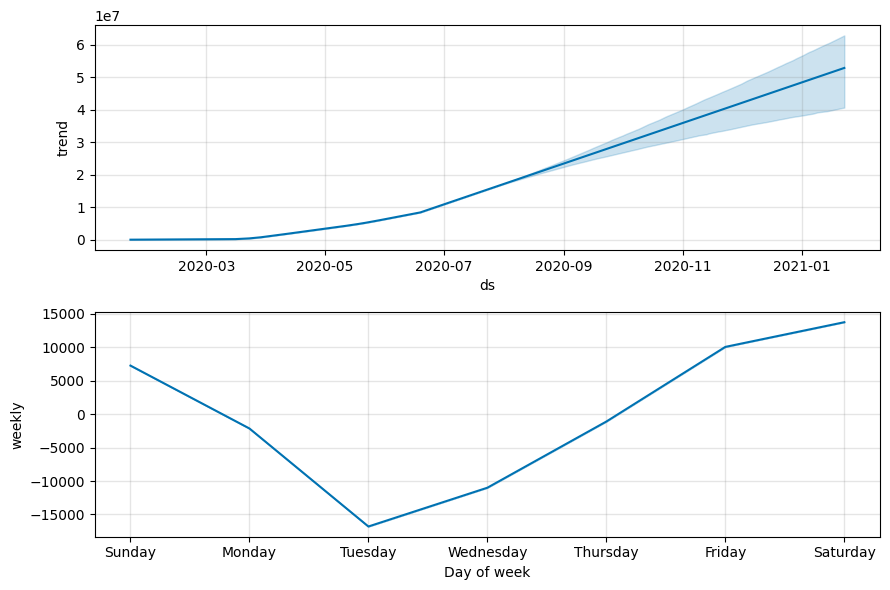

In [50]:
#ploting yearly and weekly trends for confirmed cases
confirm_plot_components = model_confirmcase.plot_components(forecast_confirmcase)

In [51]:
#creating model for active cases
model_recovercase = Prophet(interval_width = 0.95)

In [52]:
#fitting the model for active cases
model_recovercase.fit(recovered)

20:39:17 - cmdstanpy - INFO - Chain [1] start processing
20:39:17 - cmdstanpy - INFO - Chain [1] done processing


/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



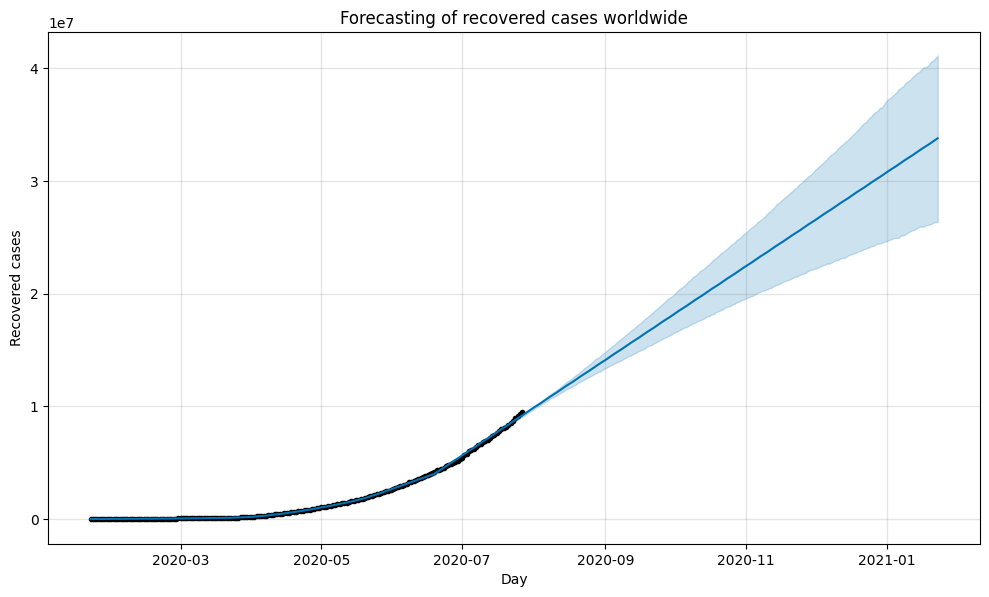

In [53]:
#forecasting and ploting for recover cases for next 180 days
forecast_recovercase = model_recovercase.predict(future)
recover_plot = model_recovercase.plot(forecast_recovercase)
plt.xlabel("Day")
plt.ylabel('Recovered cases')
plt.title('Forecasting of recovered cases worldwide')
plt.show()

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



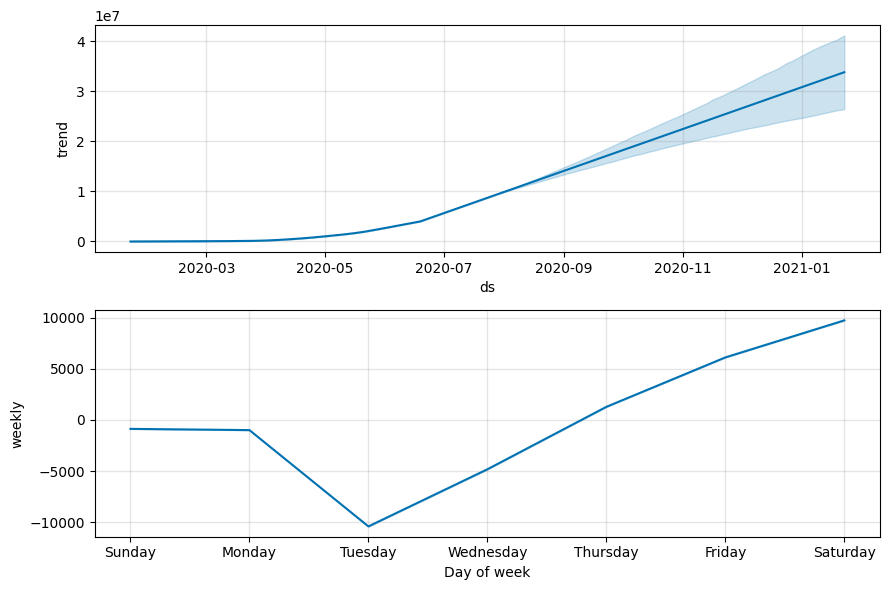

In [54]:
#ploting yearly and weekly trends for recovered cases
recover_components = model_recovercase.plot_components(forecast_recovercase)

In [55]:
#creating and fitting model for death cases. Forecasting for next 180 days
model_deathcase = Prophet(interval_width = 0.95)
model_deathcase.fit(death)
forecast_deathcase = model_deathcase.predict(future)
forecast_deathcase

20:39:19 - cmdstanpy - INFO - Chain [1] start processing
20:39:19 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-5.211895e+02,-3875.935654,2.098866e+03,-521.189516,-5.211895e+02,-190.974691,-190.974691,-190.974691,-190.974691,-190.974691,-190.974691,0.0,0.0,0.0,-7.121642e+02
1,2020-01-23,-4.323805e+02,-3077.669932,3.053917e+03,-432.380521,-4.323805e+02,388.522904,388.522904,388.522904,388.522904,388.522904,388.522904,0.0,0.0,0.0,-4.385762e+01
2,2020-01-24,-3.435715e+02,-2273.395649,3.511299e+03,-343.571525,-3.435715e+02,874.307070,874.307070,874.307070,874.307070,874.307070,874.307070,0.0,0.0,0.0,5.307355e+02
3,2020-01-25,-2.547625e+02,-2731.928223,3.699501e+03,-254.762530,-2.547625e+02,726.450908,726.450908,726.450908,726.450908,726.450908,726.450908,0.0,0.0,0.0,4.716884e+02
4,2020-01-26,-1.659535e+02,-3316.723303,2.607279e+03,-165.953535,-1.659535e+02,-165.744835,-165.744835,-165.744835,-165.744835,-165.744835,-165.744835,0.0,0.0,0.0,-3.316984e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2021-01-19,1.533531e+06,945395.210881,2.061592e+06,946787.786755,2.063605e+06,-727.670650,-727.670650,-727.670650,-727.670650,-727.670650,-727.670650,0.0,0.0,0.0,1.532803e+06
364,2021-01-20,1.538562e+06,943467.083086,2.072921e+06,945763.747131,2.072677e+06,-190.974691,-190.974691,-190.974691,-190.974691,-190.974691,-190.974691,0.0,0.0,0.0,1.538371e+06
365,2021-01-21,1.543593e+06,943734.299805,2.081685e+06,944400.033460,2.081799e+06,388.522904,388.522904,388.522904,388.522904,388.522904,388.522904,0.0,0.0,0.0,1.543982e+06
366,2021-01-22,1.548624e+06,944319.403451,2.093704e+06,943048.114963,2.091248e+06,874.307070,874.307070,874.307070,874.307070,874.307070,874.307070,0.0,0.0,0.0,1.549499e+06


/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



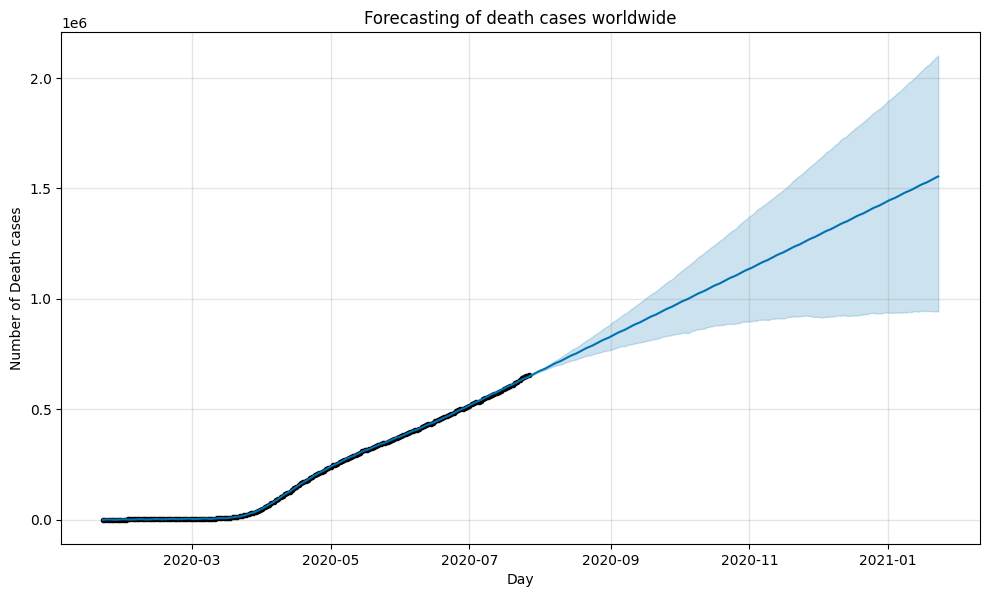

In [56]:
#  ploting forecast for death cases
death_plot = model_deathcase.plot(forecast_deathcase)
plt.xlabel("Day")
plt.ylabel('Number of Death cases')
plt.title('Forecasting of death cases worldwide')
plt.show()

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



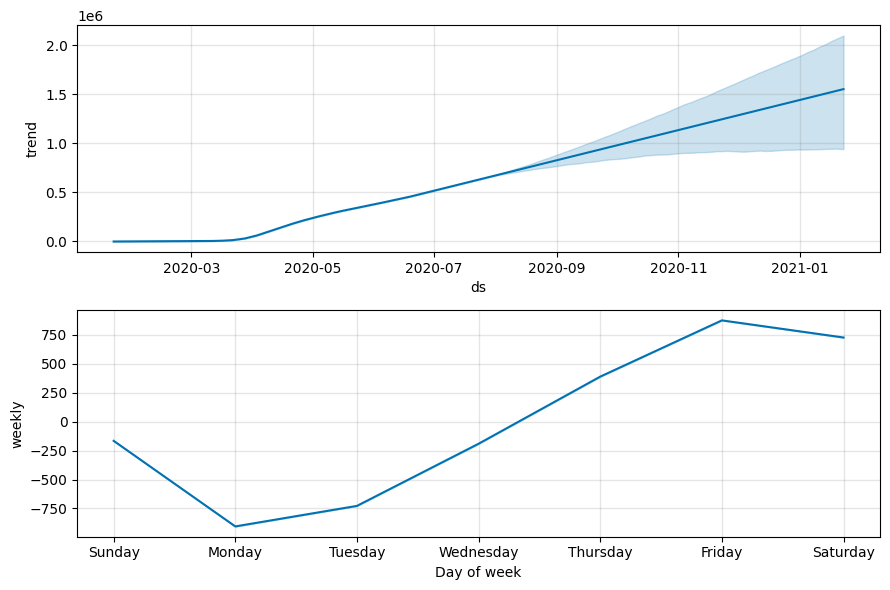

In [57]:
#ploting components for death cases
death_plot_components = model_deathcase.plot_components(forecast_deathcase)

In [59]:
#creating dataset for recovered to death ratio
recovered_death_ratio = data.groupby('Date')[['Recovered','Deaths']].sum().reset_index()
recovered_death_ratio

,Date,Recovered,Deaths
0,2020-01-22,28,17
1,2020-01-23,30,18
2,2020-01-24,36,26
3,2020-01-25,39,42
4,2020-01-26,52,56
...,...,...,...
183,2020-07-23,8710969,633506
184,2020-07-24,8939705,639650
185,2020-07-25,9158743,644517
186,2020-07-26,9293464,648621


In [60]:
recovered_death_ratio['R/D ratio'] = recovered_death_ratio['Recovered']/recovered_death_ratio['Deaths']
recovered_death_ratio.drop(['Recovered','Deaths'],axis=1,inplace=True)
recovered_death_ratio

,Date,R/D ratio
0,2020-01-22,1.647059
1,2020-01-23,1.666667
2,2020-01-24,1.384615
3,2020-01-25,0.928571
4,2020-01-26,0.928571
...,...,...
183,2020-07-23,13.750413
184,2020-07-24,13.975932
185,2020-07-25,14.210243
186,2020-07-26,14.328034


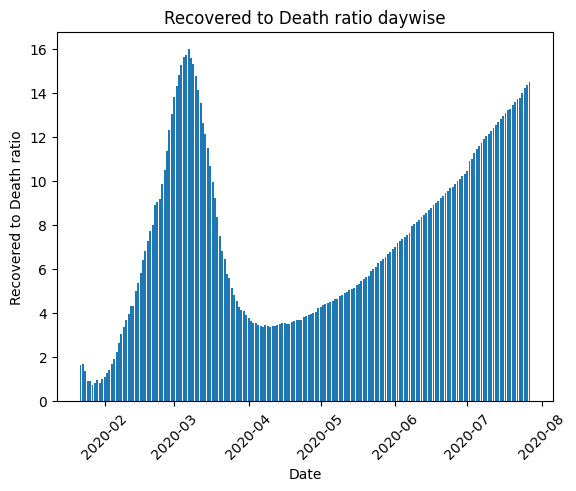

In [61]:
plt.bar(recovered_death_ratio['Date'], recovered_death_ratio['R/D ratio'])
plt.xlabel('Date')
plt.ylabel('Recovered to Death ratio')
plt.xticks(rotation = 45)
plt.title('Recovered to Death ratio daywise')
plt.show()

In [62]:
# Converting column name and data type to fit model
recovered_death_ratio.columns = ['ds','y']
recovered_death_ratio['ds'] = pd.to_datetime(recovered_death_ratio['ds'])
recovered_death_ratio

,ds,y
0,2020-01-22,1.647059
1,2020-01-23,1.666667
2,2020-01-24,1.384615
3,2020-01-25,0.928571
4,2020-01-26,0.928571
...,...,...
183,2020-07-23,13.750413
184,2020-07-24,13.975932
185,2020-07-25,14.210243
186,2020-07-26,14.328034


In [63]:
#xreating and fitting the model for RD ratio.
model_RDratio = Prophet(interval_width = 0.95)
model_RDratio.fit(recovered_death_ratio)

20:41:58 - cmdstanpy - INFO - Chain [1] start processing
20:41:58 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
# Forecasting the ratio for next 360 days
future_RD = model_RDratio.make_future_dataframe(periods=360,freq='D')
forecast_RDratio = model_RDratio.predict(future_RD)
forecast_RDratio

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,4.307082,-2.517794,10.851439,4.307082,4.307082,-0.070981,-0.070981,-0.070981,-0.070981,-0.070981,-0.070981,0.0,0.0,0.0,4.236102
1,2020-01-23,4.343381,-2.374902,10.866578,4.343381,4.343381,-0.050857,-0.050857,-0.050857,-0.050857,-0.050857,-0.050857,0.0,0.0,0.0,4.292524
2,2020-01-24,4.379680,-2.210447,10.618426,4.379680,4.379680,-0.027121,-0.027121,-0.027121,-0.027121,-0.027121,-0.027121,0.0,0.0,0.0,4.352560
3,2020-01-25,4.415979,-2.430756,10.471506,4.415979,4.415979,0.033829,0.033829,0.033829,0.033829,0.033829,0.033829,0.0,0.0,0.0,4.449809
4,2020-01-26,4.452278,-2.300871,10.896651,4.452278,4.452278,0.053584,0.053584,0.053584,0.053584,0.053584,0.053584,0.0,0.0,0.0,4.505862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,2021-07-18,31.552769,20.846312,42.299277,23.422943,39.469557,0.053584,0.053584,0.053584,0.053584,0.053584,0.053584,0.0,0.0,0.0,31.606352
544,2021-07-19,31.609220,20.790655,42.651740,23.441667,39.549082,0.069972,0.069972,0.069972,0.069972,0.069972,0.069972,0.0,0.0,0.0,31.679191
545,2021-07-20,31.665670,21.175281,41.838379,23.460391,39.628607,-0.008426,-0.008426,-0.008426,-0.008426,-0.008426,-0.008426,0.0,0.0,0.0,31.657244
546,2021-07-21,31.722121,21.427645,41.431741,23.479115,39.708133,-0.070981,-0.070981,-0.070981,-0.070981,-0.070981,-0.070981,0.0,0.0,0.0,31.651141


/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



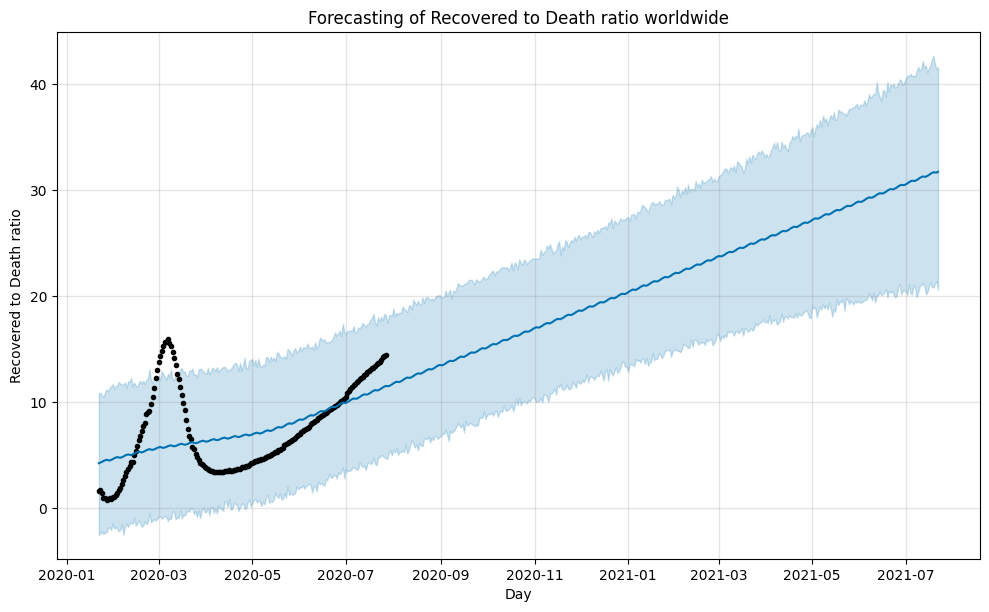

In [65]:
# Ploting the forecast for RD ratio
RDratio_plot = model_RDratio.plot(forecast_RDratio)
plt.xlabel("Day")
plt.ylabel('Recovered to Death ratio')
plt.title('Forecasting of Recovered to Death ratio worldwide')
plt.show()

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



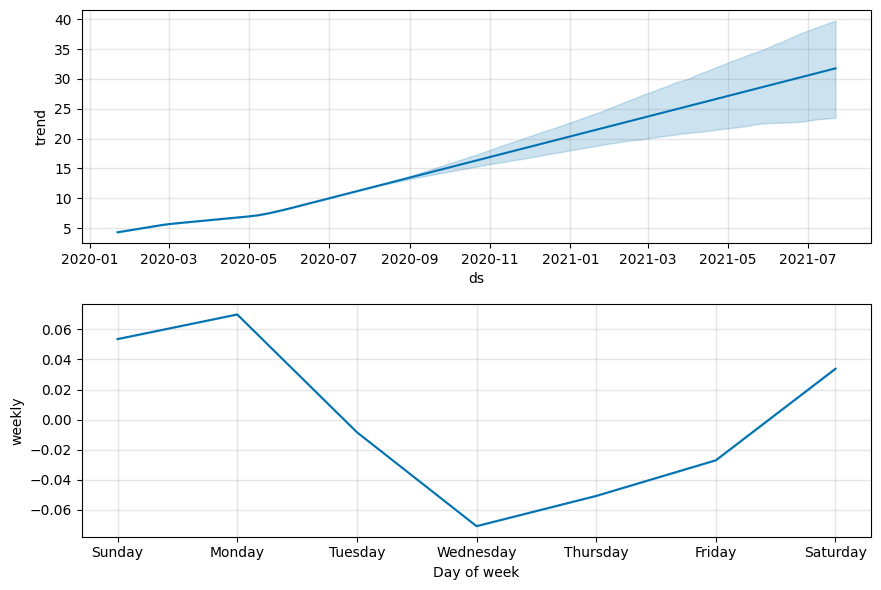

In [66]:
#Ploting components for RD ratio
RDratio_plot_components = model_RDratio.plot_components(forecast_RDratio)